---
layout: default
title: "Deep Learning - Dropout regularization"
categories: deeplearning
permalink: /ML27/
order: 27
comments: true
---

In [2]:
%pylab --no-import-all inline
import pandas as pd
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


#  Dropout
A very powerful reguralization technique is called dropout. 

In dropout we will assign for each layer a probability $p$ of retaining each node in the layer (<a href="#dropout">figure below</a>). We will then randomly remove a different set of nodes **for each examples**, according to their layer probabilities. So for each training example you will train the model using a random reduced network.

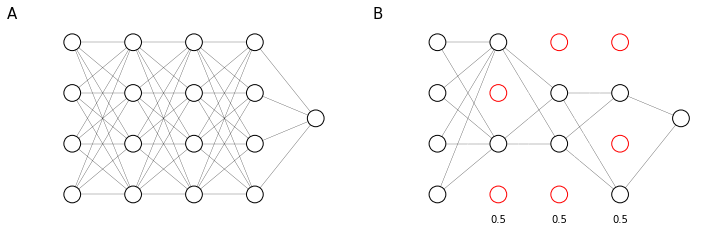

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = axes
ann([4, 4, 4, 4, 1], ax=ax1, width=1.5, radius=1.5)

ann([4, 4, 4, 4, 1], ax=ax2, width=1.5, radius=1.5, layer_labels=['', 0.5, 0.5, 0.5], 
   node_colors=list('kkkkkrkrrkkrrkrkk'), edge_colors=list('kwkwkwkwkwkwkwkwwkkwwwwwwkkwwwwwwwwwwkwkwkwkwwwwwkwk'))

for ax, l in zip(axes, 'AB'):
    ax.set_aspect('equal')
    ax.text(-0.1, 1.05, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')

<i id ="dropout">A four layers neural network (A) and a random drop of its hidden units according to the probability set for each layer (B)</i>

The effect of dropout is to **spread the weights** across hidden units during training. Since sometimes some of the hidden units are unavailable, the model is trained not to "rely" on any single unit. The spreading of weights has a similar effect as $L_2$ regularization and, while they have some different implications, they tend to have a pretty similar effect.

The retain probability $p$ can be set at a different value for each layer and usually is set lower for layer that have more risk to suffer from overfitting. For example, suppose we have the neural network represented in <a href="#diffdropout">the figure below</a>: we would retain all nodes in the input layer ($p=1$) and and the first layer ($w \in \mathbb{R}^{7, 1}$); apply a rather low retain probability to the second layer ($w \in \mathbb{R}^{7, 7}$), which is the layer that has the most probability to suffer from overfitting, an higher retain probability to the third layer ($w \in \mathbb{R}^{3, 7}$) and keep all other units.

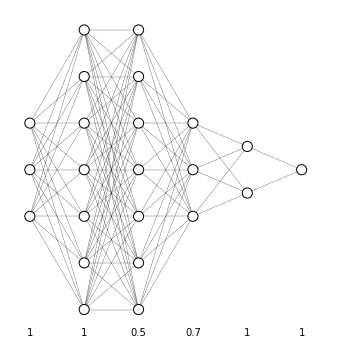

In [44]:
fig, ax = plt.subplots(figsize=(6, 6))
ann([3, 7, 7, 3, 2, 1], ax=ax, layer_labels=[1, 1, 0.5, 0.7, 1, 1])
ax.set_aspect('equal')

<i id="diffdropout">Different retain probabilities $p$ applied on different layers $l$ of a neural network based on the size of the parameter matrix $w^{[l]}$</i>

One **downside of dropout** is to render the cost function $J$ undefined: this means that training surveillance methods such as plotting the value of $J$ at each iteration (to ensure that it is decreasing) are no longer valid.  

## Implementing dropout (inverted dropout)
Let's suppose to implement dropout for layer $l=3$. We will define a vector of dropout probabilities $d^{[3]}$ based on the keep probability $p = 0.8$ that represents the probability that each hidden unit is not discarded.

In [30]:
a3 = np.random.rand(4, 4)

In [35]:
# a3 = forward_prop()
p = 0.8 # keep probability
d3 = np.random.rand(*a3.shape) < p
a3 *= d3
a3 /= p # inverted dropout

The last operation is used to counterbalance the random elimination of hidden units. In fact, continuing in forward propagation we would have:

$$
z^{[4]} = w^{[4]}  \underbrace{a^{[3]}}_\text{reduced 1-p times}  + b^{[4]}
$$

So by applying $a^{[3]} = \frac{a^{[3]}}{0.8}$ we would bump up the values of $a^{[3]}$ by 20% and counter the reduction produced shutting nodes off. This is called the **inverted dropout** technique and ensures that, independently from the value of $p$, the expected value of $a$ remains the same.

Inverted dropout removes the need to scale up parameters at test time. In fact, at test time you will just forward propagate from input to prediction and, by applying the inverted dropout the activation scale is automatically correct.